In [80]:
# make bar chart that has rdrp mutations or no rdrp mutations on the x-axis and percentage with stop codons in orf3 or orf4b on the y-axis

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file = "../../../../intermediate-results-only-camels/mut_and_host_info_by_tip.json"

with open(file, 'r') as f:
    mut_info_by_tip = json.load(f)

In [81]:
rdrp_count = 0
no_rdrp_count = 0
exon_count = 0
no_exon_count = 0
rdrp = {"Orf3": 0, "Orf4b": 0}
exon = {"Orf3": 0, "Orf4b": 0}
no_rdrp = {"Orf3": 0, "Orf4b": 0}
no_exon = {"Orf3": 0, "Orf4b": 0}

for tip, info in mut_info_by_tip.items():
    muts_on_path = info.get('muts_on_path', {})
    if 'RdRpb' in muts_on_path or 'RdRpa' in muts_on_path:
        rdrp_count += 1
        for gene in rdrp.keys():
            if gene in muts_on_path:
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        rdrp[gene] += 1
                        break  # Exit the for-loop once a stop codon mutation is found
    else:
        no_rdrp_count += 1
        for gene in rdrp.keys():
            if gene in muts_on_path:
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        no_rdrp[gene] += 1
                        break  # Exit the for-loop once a stop codon mutation is found

    if 'ExoN' in muts_on_path:
        exon_count += 1
        for gene in rdrp.keys():
            if gene in muts_on_path:
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        exon[gene] += 1
                        break  # Exit the for-loop once a stop codon mutation is found
    else:
        no_exon_count += 1
        for gene in rdrp.keys():
            if gene in muts_on_path:
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        no_exon[gene] += 1
                        break  # Exit the for-loop once a stop codon mutation is found
for gene in rdrp.keys():
    rdrp[gene] = rdrp[gene] / rdrp_count
    no_rdrp[gene] = no_rdrp[gene] / no_rdrp_count

    exon[gene] = exon[gene] / exon_count
    no_exon[gene] = no_exon[gene] / no_exon_count


print(rdrp)
print(no_rdrp)

print(exon)
print(no_exon)

{'Orf3': 0.4155844155844156, 'Orf4b': 0.16883116883116883}
{'Orf3': 0.02976190476190476, 'Orf4b': 0.02976190476190476}
{'Orf3': 0.10594315245478036, 'Orf4b': 0.056847545219638244}
{'Orf3': 0.038461538461538464, 'Orf4b': 0.038461538461538464}


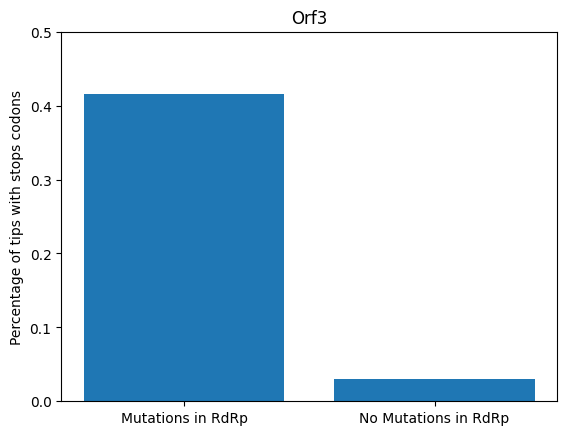

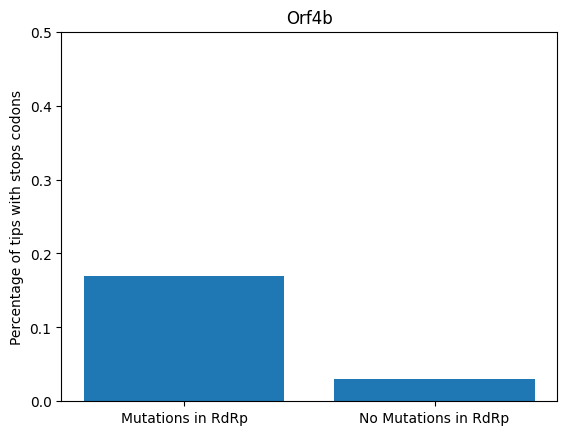

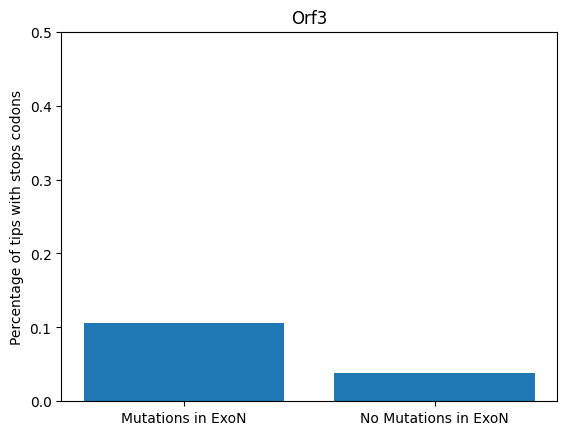

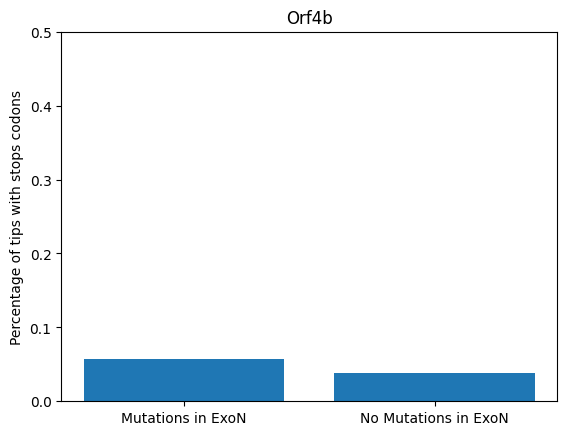

In [82]:
for gene in rdrp.keys():
    # Data from the dictionaries
    data = [
        rdrp[gene],
        no_rdrp[gene]
    ]

    # Extract the keys (categories) and values
    categories = ["Mutations in RdRp", "No Mutations in RdRp"]
    

    plt.bar(categories, data)
    plt.ylabel("Percentage of tips with stops codons")
    plt.ylim(0.00, 0.50)
    plt.title(gene)
    plt.show()

for gene in exon.keys():
    # Data from the dictionaries
    data = [
        exon[gene],
        no_exon[gene]
    ]

    # Extract the keys (categories) and values
    categories = ["Mutations in ExoN", "No Mutations in ExoN"]
    

    plt.bar(categories, data)
    plt.ylabel("Percentage of tips with stops codons")
    plt.ylim(0.00, 0.50)
    plt.title(gene)
    plt.show()
